<center><h1>Cálculo Numérico</h1></center>
<center><h2>ANN 2022/1</h2></center>
<center><h3>Prof. Fernando Deeke Sasse - CCT, UDESC</h3></center>    
<center><h2>Métodos de Verlet  </h2> </center>

##  1 . Método de Verlet tradicional

A integração de Verlet é um método numérico com erro global de terceira ordem usado principalmente para integrar as equações de Newton do movimento. Ela é usada frequentemente para calcular trajetórias de partículas em simulações de dinâmica molecular e computação gráfica. Se o vetor posição de uma partícula é dado por 

$$
X(t)=\begin{bmatrix} x_1(t),\\ x_2(t) \\ x_3(t)  \end{bmatrix}, \qquad (1)
$$

o método é particularmente apropriado nos casos em temos uma equação de movimento para a partícula de massa $m$ é da forma

$$
\frac{d^2X}{dt^2} = \frac{1}{m}F(t,X(t)),\qquad (2)
$$

ou seja, quando $F$ não depende de um termo dissipativo $dX/dt$. Daqui para frente vamos supor que as forças envolvidas na dinâmica são todas da forma $F(t,X(t))$. 

O método foi usado já em 1791 por Delambre, por Carl Størmer em 1907 para estudar trajetória de partículas em um campo eletromagnético e também por Crommelin em 1909 para computar órbita do cometa Halley. Em 1967 o método foi popularizado na aplicação a problemas de dinâmica molecular por Loup Verlet [1]. Características importantes do método são sua estabilidade e reversibilidade temporal e rapidez, comparado com outros métodos. Para maiores detalhes veja o artigo de Rojas et al. [2,3]. 

Como ponto de partida desenvolvemos em série de Taylor as posições $X(t)$ em termos de pequenos incrementos de tamanho $h$, para o futuro e para o passado: 

$$
X(t+h)=X(t)+hV(t)+\frac{h^2}{2}A(t) + \frac{h^3}{3!}\frac{dA}{dt} +O(h^4),\qquad (3)
$$

$$
X(t-h)=X(t)-hV(t)+\frac{h^2}{2}A(t)- \frac{h^3}{3!}\frac{dA}{dt}  +O(h^4), \qquad (4)
$$

sendo $V(t)$ a velocidade e $A(t)$ a aceleração, dados por 

$$
V(t)=\frac{dX}{dt}\,,\quad A(t) = \frac{dV}{dt}= \frac{d^2X}{dt^2} .\qquad (5)
$$

Somando as equações acima obtemos 

$$
X(t+h) = 2 X(t) - X(t-h)+h^2A(t)+O(h^4),\qquad (6)
$$

de modo que a velocidade e a derivada da aceleração foram eliminados. Podemos também reescrever a equação acima como 

$$
X(t+h) = 2 X(t) - X(t-h)+\frac{h^2}{m}F(t,X(t))+O(h^4), \qquad (7)
$$

Apesar de que o erro local seja $O(h^4)$, é possível mostrar que o erro global é de ordem $O(h^2)$ e não $O(h^3)$. 

Caso a velocidade seja necessária, por exemplo, para o cálculo da energia cinética, a expressão da diferença finita central:

$$
V(t) = \frac{X(t+h)-X(t-h)}{2h}+O(h^2)\,, \qquad (8)
$$


pode ser utilizada.

A equação (7) é característica de um método multipasso implícito. O termo $X(t+h)$ deve ser obtido a partir de $X(t)$ e $X(t-h)$. O primeiro termo é uma condição inicial do problema para $t=t_0$. O segundo termo não é dado, mas pode ser calculado por algum método explícito, tal como o método de Euler:

$$ 
X(t_0-h) = X(t_0)-h V(t_0),\qquad (9)
$$

notando que $X(t_0)$ e $V(t_0)$ são condições iniciais do problema. 

Um dos possíveis problemas do método iterativo obtido a partir de (7) é a possibilidade do aparecimento de grandes erros de arredondamento na adição de termos com magnitudes muito diferentes. O termo $h^2 F(t,X(t))/m$ pode tornar-se muito pequeno devido ao fator $h^2$, comparado com $2X(t)$ e $X(t-h)$, à medida que o processo evolui. Veremos correções para este problema mais adiante. 

### Exemplo 1.1

Consideremos o problema da órbita da Terra em torno do Sol. Esta abordagem segue o vídeo [2] Tal como no problema anterior, sendo a força central, o momento angular é conservado e o movimento é planar, ou seja, pode ser descrito em um plano $xy$.  A lei de Newton da gravitação universal que descreve a dinâmica do movimento da Terra sob influência da força gravitacional do Sol é dada por

$$
\mathbf{F}=m \mathbf{a}=-\frac{GMm}{|\mathbf{r}-\mathbf{R}|^3}(\mathbf{r}-\mathbf{R}), \qquad (10)
$$

sendo $\mathbf{a}=d^2\mathbf{r}/dt^2 = (a_x,a_y)$ a aceleração da Terra,  $\mathbf{r}=(x,y)$ a posição da Terra, $\mathbf{R}=(X,Y)$ a posição do Sol, $m$ a massa da Terra, $M$ a massa do Sol e $G$ é a constante universal da gravitação. Por simplicidade suporemos que o Sol está na origem do sistema do coordenadas, ou seja, $\mathbf{R}=\mathbf{0}$. Temos então a seguinte expressão para a aceleração da Terra: 

$$
\mathbf{a} =-\frac{GM}{|\mathbf{r}|^3}\mathbf{r}\,.\qquad (11)
$$

Usaremos unidades físicas convenientes em astronomia. A unidade distância é unidade astronômica (AU). Tomaremos $h= 1\, dia$. A unidade de massa é a massa solar $(M_S)$. Suporemos que no instante $t=0$ a Terra está na posição $x=1\,AU$, $y=0$. A velocidade neste ponto, é  $v_y(0)=0.01721420632\, AU/dia$. A constante gravitacional nestas unidades é dada por $G = 0.0003006696114086956\,dias^3/M_S$. Obviamente, $M=1 M_S$. 



In [1]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np

In [2]:
G = 6.67e-11*(6.68e-12)**3/((5e-31)*(1.15e-5)**2)
M=1.

In [3]:
ax = lambda x,y: -G*M/(np.sqrt(x**2+y**2))**3*x
ay = lambda x,y: -G*M/(np.sqrt(x**2+y**2))**3*y
a = [ax,ay]

In [4]:
t = np.linspace(0,1360,1361)
h = t[1]-t[0]
h

1.0

In [5]:
x0 = 1.
y0 = 0.
vx0 = 0
vy0 = 0.01721420632

In [6]:
def verlet(a,x0,y0):
    ax = a[0]
    ay = a[1]
    x = np.zeros(len(t))
    y = np.zeros(len(t))
    x[0] = x0 
    y[0] = y0 
    x[1] = x0 + h*vx0
    y[1] = y0 + h*vy0
    for n in range(1,len(t)-1):
        x[n+1]=2*x[n]-x[n-1]+h**2*ax(x[n],y[n])
        y[n+1]=2*y[n]-y[n-1]+h**2*ay(x[n],y[n])
    return (x,y)

In [7]:
(X,Y) = verlet(a,x0,y0)

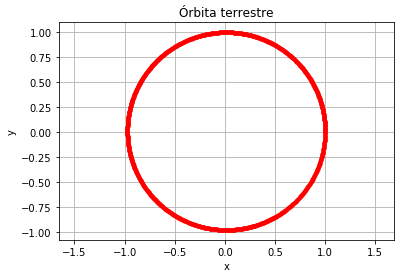

In [8]:
plt.plot(X,Y,'r-')
plt.grid(True)
plt.title("Órbita terrestre");
plt.xlabel('x')
plt.ylabel('y')
plt.axis('equal');

Examinemos o tempo de execução:

In [12]:
timeit(verlet(a,x0,y0))

11.9 ms ± 233 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


## 2. Velocity-Verlet

De (8) temos que 

$$
X(t-h)=X(t+h)-2hV(t)\,.\qquad(12)
$$

Substituindo esta expressão em (7) obtemos

$$
X(t+h) = 2X(t)-\left[X(t+h)-2hV(t)\right]+\frac{h^2}{m}F(t,X(t))+O(h^4)\,. \qquad (13)
$$

Isolando $X(t+h)$ obtemos

$$
X(t+h)=X(t)+hV(t)+\frac{h^2}{2m}F(t,X(t))+O(h^4)\,. \qquad (14)
$$. 

O próximo passo consiste em determinar uma fórmula para calcular $V(t+h)$ com acurácia $O(h^2)$. Substituindo (14) em (8) temos

\begin{align}
V(t)&=\frac{X(t+h)-X(t-h)}{2h}+O(h^2)\qquad(15)\\ 
&=\frac{1}{2h}\left[X(t)+hV(t)+\frac{h^2}{2m}F(t,X(t))\right]-\frac{X(t-h)}{2h}+O(h^2)\qquad(16)\\ 
&=\frac{X(t)}{2h}+\frac{V(t)}{2}+\frac{h}{4m}F(t,X(t))-\frac{X(t-h)}{2h}+O(h^2)\,.\qquad (17)
\end{align}
Isolando $V(t)$ obtemos

$$
V(t) = \frac{X(t)-X(t-h)}{h}+\frac{h}{2m}F(t,X(t))+O(h^2)\,. \qquad(18)
$$

De (18) temos então 

$$
V(t+h) = \frac{X(t+h)-X(t)}{h}+\frac{h}{2m}F(t,X(t+h))+O(h^2)\,. \qquad(19)
$$

Somando (18) e (19) obtemos

$$
V(t+h)+V(t)=\underbrace{\frac{X(t+h)-X(t-h)}{h}}_{2V(t)}+\frac{h}{2m}F(t,X(t+h))+O(h^2)\,. \qquad(20)
$$

Portanto, 
$$
V(t+h)=V(t)+\frac{h}{2m}F(t,X(t+h))+O(h^2)\,. \qquad(21)
$$

As eqs. (14) e (21) definem o chamado método velocity-Stormer-Verlet. Notemos que agora a velocidade deve ser computada a cada passo e que em (14) temos a soma de um termo de ordem $h$ com outro de ordem $h^2$. 

## 3. Exercícios

1. Implemente o método velocity-Verlet em Python e teste-o.


2. Resolva o problema da órbita usando o método de Euler melhorado. Compare-o com o método velocity-Verlet em termos de estabilidade (correta descrição da órbita). 

## Referências

1. L. Verlet, Computer experiments on classical fluids. I. Thermodynamical properties of Lennard-Jones molecules, Physical Review 159, 98 (1967).

2. J. F. Rojas, R. Martínez y M. A. Morales. Mecanica 3d: python y el algoritmo de Verlet Rev. Mex. Fis. E 60 (2014) 51–65. http://www.scielo.org.mx/pdf/rmfe/v60n1/v60n1a5.pdf

3. Método numérico de Verlet para orbitas planetarias + matplotlib: https://youtu.be/d5R8odwgceM